In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.impute import SimpleImputer 
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dt = pd.read_csv("student.csv")
dt.head()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          145 non-null    int64 
 1   Id                  145 non-null    int64 
 2   Student_Age         145 non-null    int64 
 3   Sex                 145 non-null    object
 4   High_School_Type    145 non-null    object
 5   Scholarship         144 non-null    object
 6   Additional_Work     145 non-null    object
 7   Sports_activity     145 non-null    object
 8   Transportation      145 non-null    object
 9   Weekly_Study_Hours  145 non-null    int64 
 10  Attendance          145 non-null    object
 11  Reading             145 non-null    object
 12  Notes               145 non-null    object
 13  Listening_in_Class  145 non-null    object
 14  Project_work        145 non-null    object
 15  Grade               145 non-null    object
dtypes: int64(4), object(12)
me

In [4]:
dt.describe()

,Unnamed: 0,Id,Student_Age,Weekly_Study_Hours
count,145.000000,145.000000,145.000000,145.000000
mean,72.000000,5073.000000,19.682759,2.331034
std,42.001984,42.001984,1.992010,4.249273
min,0.000000,5001.000000,18.000000,0.000000
25%,36.000000,5037.000000,18.000000,0.000000
50%,72.000000,5073.000000,19.000000,0.000000
75%,108.000000,5109.000000,21.000000,2.000000
max,144.000000,5145.000000,26.000000,12.000000


In [5]:
dt.isnull().sum()

Unnamed: 0            0
Id                    0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           1
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

## PreProcess

### Handle Missing Value

In [10]:
for col in dt.select_dtypes(include=['float64', 'int64']).columns:
    dt[col].fillna(dt[col].mean(), inplace=True)

for col in dt.select_dtypes(include=['object']).columns:
    dt[col].fillna(dt[col].mode()[0], inplace=True)

In [11]:
dt.isnull().sum()

Unnamed: 0            0
Id                    0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

### Label Encoder

In [15]:
label_encoder = LabelEncoder()
for column in dt.columns:
    if dt[column].dtype == type(object):
        dt[column] = label_encoder.fit_transform(dt[column])

In [16]:
dt.head()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,1,0,2,1,0,1,0,1,1,2,1,0,0
1,1,5002,20,1,0,2,1,0,1,0,1,1,1,2,1,0
2,2,5003,21,1,2,2,0,0,1,2,2,0,1,1,1,0
3,3,5004,18,0,1,2,1,0,0,2,1,0,2,1,0,0
4,4,5005,22,1,1,2,0,0,0,12,1,1,1,2,1,0


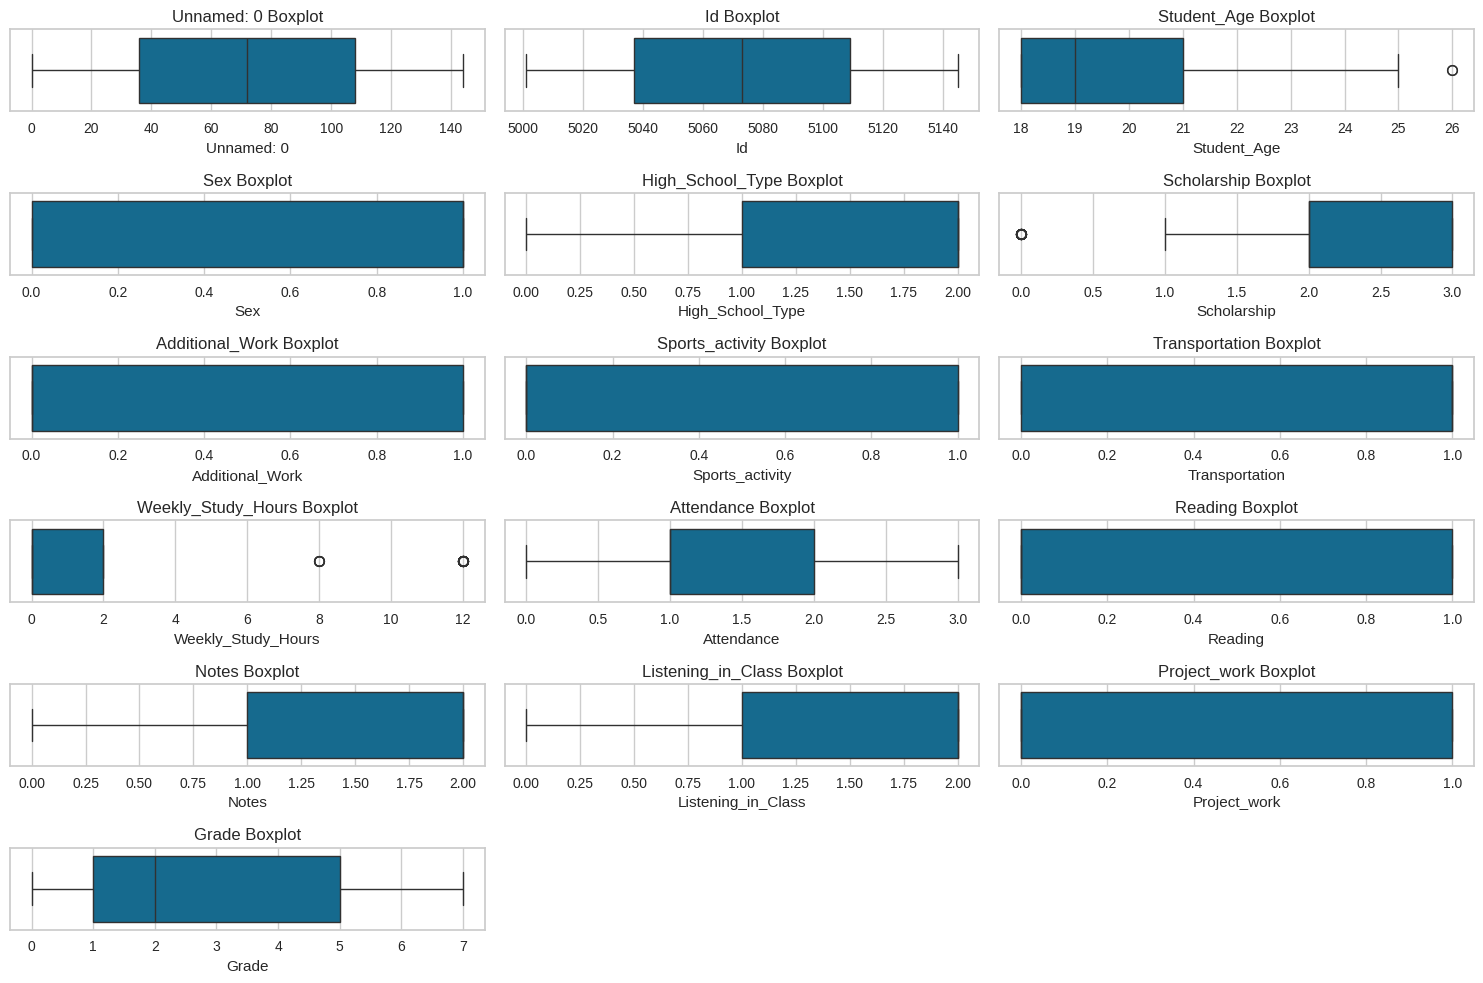

In [17]:
col_box = dt.columns

plt.figure(figsize = (15, 10))

for i, column in enumerate(col_box, 1):
    plt.subplot((len(col_box)//3)+1, 3, i)
    sns.boxplot(data=dt, x=column)    
    plt.xlabel(column)
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

<AxesSubplot: >

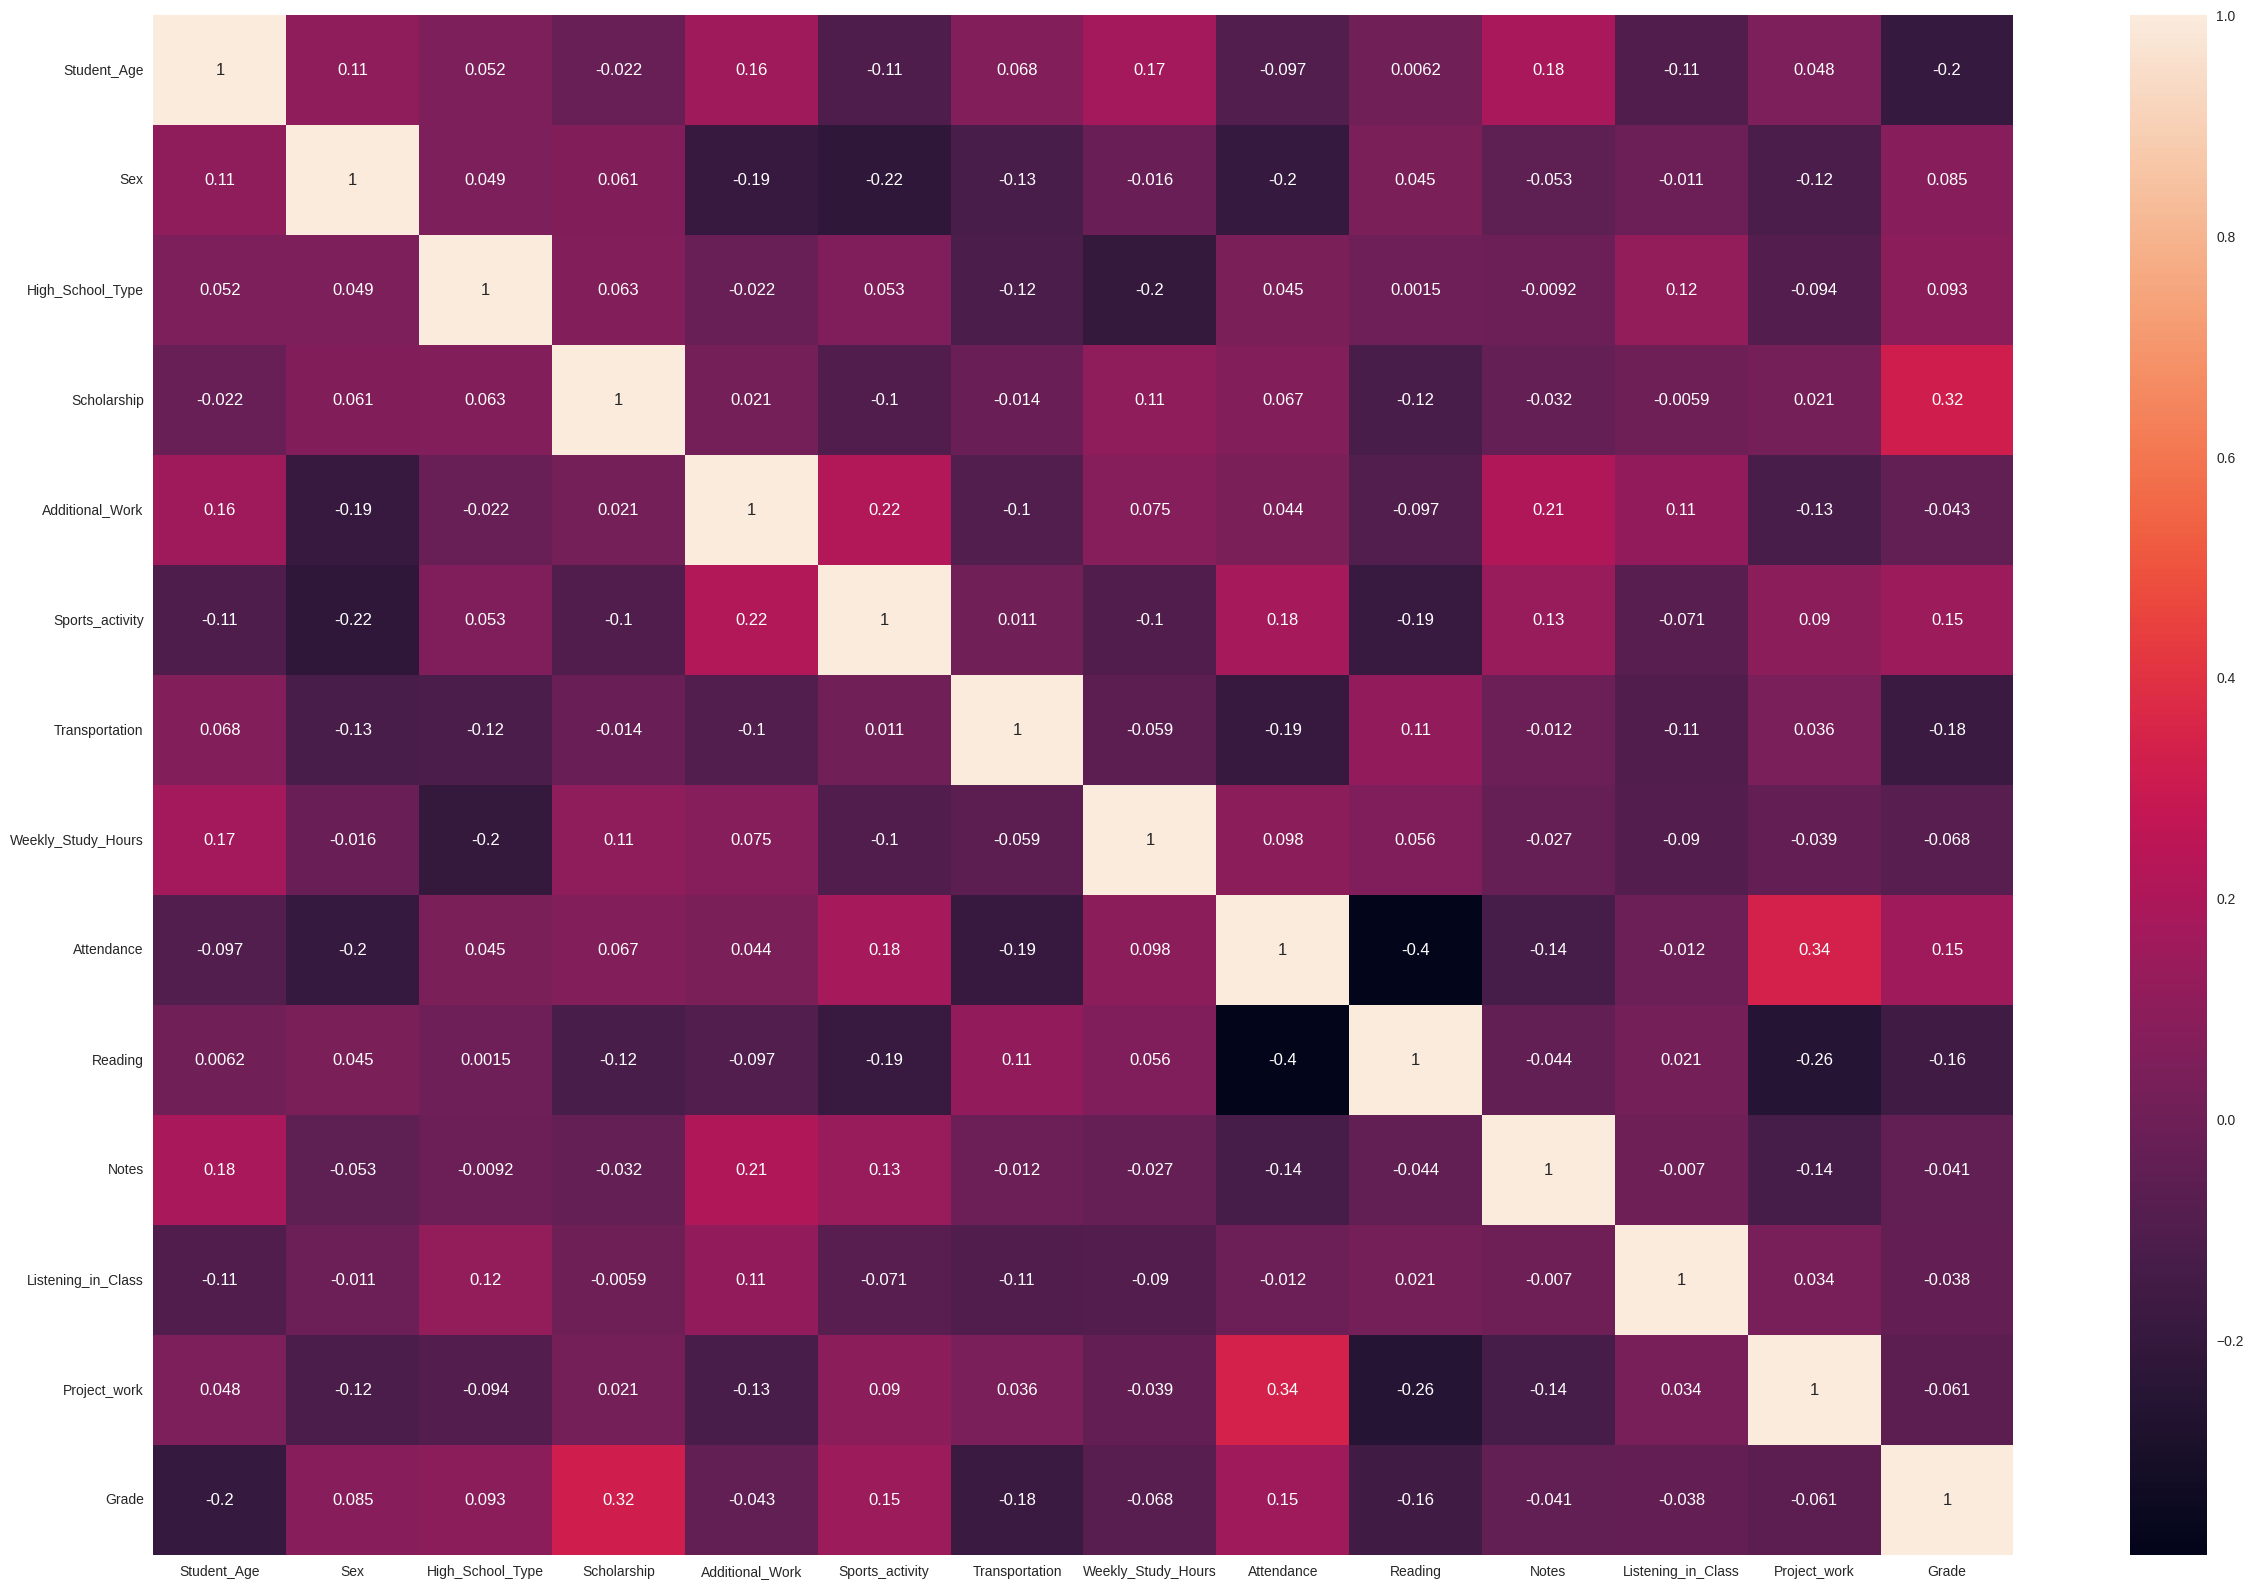

In [21]:
dt = dt.drop('Unnamed: 0', axis=1)
dt = dt.drop('Id', axis=1)
heatbox = dt.columns

plt.figure(figsize=(30,20))
sns.heatmap(dt[heatbox].corr(), annot=True)

## Train Model

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split data
X = dt.drop('Grade', axis=1)  # replace 'target' with your actual target column
y = dt['Grade']  # replace 'target' with your actual target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.10344827586206896


In [30]:
dt.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,2,1,0,1,0,1,1,2,1,0,0
1,20,2,1,0,1,0,1,1,1,2,1,0
2,21,2,0,0,1,2,2,0,1,1,1,0
3,18,2,1,0,0,2,1,0,2,1,0,0
4,22,2,0,0,0,12,1,1,1,2,1,0
